In [370]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath("../data/raw"))

In [371]:
df = pd.read_csv("../data/raw/resume.csv", encoding= "utf-8")

In [372]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [373]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [374]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

From above, we can see that we have no missing values
we can also see that the resume column has alot of characters that can degrade performance, so we'll fix that  

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [376]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [377]:
for item in df.columns:
    df[item] = df[item].str.lower()
    

In [378]:
df.head()

,Category,Resume
0,data science,skills * programming languages: python (pandas...
1,data science,education details \r\nmay 2013 to may 2017 b.e...
2,data science,"areas of interest deep learning, control syste..."
3,data science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,data science,"education details \r\n mca ymcaust, faridab..."


In [379]:
df["Resume"] = df["Resume"].str.strip()
df["Resume"].astype(str).apply(lambda x : x.endswith(' ') or x.startswith(' ')).sum()


0

In [380]:
sys.path.append(os.path.abspath("../"))

In [381]:
from src.data_preprocessing import *

In [382]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [383]:
df["Resume"] = df["Resume"].apply(clean_text)
df["Resume"] = df["Resume"].apply(remove_dates)
df["Resume"] = df["Resume"].apply(remove_newlines)
df["Resume"] = df["Resume"].apply(remove_urls)
df["Resume"] = df["Resume"].apply(remove_non_ascii_regex)


In [384]:
strip_column_whitespace_inplace(df, "Resume")

In [385]:
df.head(8)

,Category,Resume
0,data science,programming language python panda numpy scipy ...
1,data science,education detail uitrgpv data scientist data s...
2,data science,area interest deep learning control system des...
3,data science,r python sap hana tableau sap hana sql sap han...
4,data science,education detail mca ymcaust faridabad haryana...
5,data science,c basic iot python matlab data science machine...
6,data science,python tableau data visualization r studio mac...
7,data science,education detail btech rayat bahra institute e...


In [386]:
df["num_unique_words"] = df["Resume"].apply(lambda x: len(set(x.split())))
df["avg_word_length"] = df["Resume"].apply(lambda x: sum(len(w) for w in x.split()) / max(len(x.split()), 1))

In [387]:
df["num_digits"] = df["Resume"].apply(lambda x: len(re.findall(r'\d+', x)))
df["num_sentences"] = df["Resume"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [388]:
from src.feature_engineering import *
df["num_tech_keywords"] = df["Resume"].apply(count_keywords)

In [389]:
df["has_management_terms"] = df["Resume"].apply(has_management_terms)
df["has_degree"] = df["Resume"].apply(has_degree_mention)
df["num_certs"] = df["Resume"].apply(num_certifications)
df["num_langs"] = df["Resume"].apply(num_languages_mentioned)

In [390]:
df.head(5)

,Category,Resume,num_unique_words,avg_word_length,num_digits,num_sentences,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs
0,data science,programming language python panda numpy scipy ...,304,6.925000,0,1,33,0,0,0,6
1,data science,education detail uitrgpv data scientist data s...,77,7.366071,0,1,6,0,0,0,2
2,data science,area interest deep learning control system des...,123,7.104651,0,1,17,0,1,0,6
3,data science,r python sap hana tableau sap hana sql sap han...,316,6.731387,0,1,59,1,1,0,4
4,data science,education detail mca ymcaust faridabad haryana...,25,6.125000,0,1,4,0,0,0,3


In [391]:
df.isnull().sum()

Category                0
Resume                  0
num_unique_words        0
avg_word_length         0
num_digits              0
num_sentences           0
num_tech_keywords       0
has_management_terms    0
has_degree              0
num_certs               0
num_langs               0
dtype: int64

# dropping the number of digits and number of sentences column

In [392]:
df.drop(columns= ["num_digits", "num_sentences"], axis= 1, inplace= True)
df.head()

,Category,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs
0,data science,programming language python panda numpy scipy ...,304,6.925000,33,0,0,0,6
1,data science,education detail uitrgpv data scientist data s...,77,7.366071,6,0,0,0,2
2,data science,area interest deep learning control system des...,123,7.104651,17,0,1,0,6
3,data science,r python sap hana tableau sap hana sql sap han...,316,6.731387,59,1,1,0,4
4,data science,education detail mca ymcaust faridabad haryana...,25,6.125000,4,0,0,0,3


In [393]:
def word_count(txt):
    return len(txt.split())


df["word_count"] = df["Resume"].apply(word_count)
df.head()

,Category,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count
0,data science,programming language python panda numpy scipy ...,304,6.925000,33,0,0,0,6,480
1,data science,education detail uitrgpv data scientist data s...,77,7.366071,6,0,0,0,2,112
2,data science,area interest deep learning control system des...,123,7.104651,17,0,1,0,6,172
3,data science,r python sap hana tableau sap hana sql sap han...,316,6.731387,59,1,1,0,4,685
4,data science,education detail mca ymcaust faridabad haryana...,25,6.125000,4,0,0,0,3,48


In [394]:
df_2 = df.drop(columns= ["Resume", "Category"], axis= 1 )
df_2.corr()

,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count
num_unique_words,1.000000,0.196782,0.427359,0.454731,0.126927,0.231303,0.047531,0.971768
avg_word_length,0.196782,1.000000,-0.119918,0.128701,0.088477,0.093718,-0.272280,0.132551
num_tech_keywords,0.427359,-0.119918,1.000000,0.268438,0.001204,0.159829,0.523338,0.456883
has_management_terms,0.454731,0.128701,0.268438,1.000000,0.164996,0.211848,0.007814,0.441047
has_degree,0.126927,0.088477,0.001204,0.164996,1.000000,0.197491,-0.128337,0.117118
num_certs,0.231303,0.093718,0.159829,0.211848,0.197491,1.000000,0.055946,0.235017
num_langs,0.047531,-0.272280,0.523338,0.007814,-0.128337,0.055946,1.000000,0.076551
word_count,0.971768,0.132551,0.456883,0.441047,0.117118,0.235017,0.076551,1.000000


In [395]:
df_2.describe()

,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000
mean,158.080042,6.859094,16.443867,0.561331,0.612266,0.911642,2.614345,293.228690
std,119.771526,0.414327,15.180820,0.496482,0.487487,2.064891,1.677395,264.063767
min,11.000000,5.733333,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
25%,73.000000,6.559762,5.000000,0.000000,0.000000,0.000000,1.000000,111.000000
50%,131.000000,6.884358,13.000000,1.000000,1.000000,0.000000,2.000000,215.000000
75%,207.000000,7.126033,22.000000,1.000000,1.000000,1.000000,4.000000,382.750000
max,620.000000,7.904959,71.000000,1.000000,1.000000,17.000000,8.000000,1375.000000


In [396]:
df["vocab_density"] = df["num_unique_words"] / df["word_count"]
df.head()

,Category,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count,vocab_density
0,data science,programming language python panda numpy scipy ...,304,6.925000,33,0,0,0,6,480,0.633333
1,data science,education detail uitrgpv data scientist data s...,77,7.366071,6,0,0,0,2,112,0.687500
2,data science,area interest deep learning control system des...,123,7.104651,17,0,1,0,6,172,0.715116
3,data science,r python sap hana tableau sap hana sql sap han...,316,6.731387,59,1,1,0,4,685,0.461314
4,data science,education detail mca ymcaust faridabad haryana...,25,6.125000,4,0,0,0,3,48,0.520833


In [397]:
df

,Category,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count,vocab_density
0,data science,programming language python panda numpy scipy ...,304,6.925000,33,0,0,0,6,480,0.633333
1,data science,education detail uitrgpv data scientist data s...,77,7.366071,6,0,0,0,2,112,0.687500
2,data science,area interest deep learning control system des...,123,7.104651,17,0,1,0,6,172,0.715116
3,data science,r python sap hana tableau sap hana sql sap han...,316,6.731387,59,1,1,0,4,685,0.461314
4,data science,education detail mca ymcaust faridabad haryana...,25,6.125000,4,0,0,0,3,48,0.520833
...,...,...,...,...,...,...,...,...,...,...,...
957,testing,computer proficient m office word basic excel ...,116,6.504717,7,1,1,0,2,212,0.547170
958,testing,willingness accept challenge positive thinking...,143,7.532663,3,1,0,0,1,199,0.718593
959,testing,personal quick learner eagerness learn new thi...,171,6.779605,0,1,1,3,1,304,0.562500
960,testing,computer software knowledge mspower point m of...,58,6.435897,3,1,0,0,2,78,0.743590


In [398]:
from outputs.figures.plot import *

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              962 non-null    object 
 1   Resume                962 non-null    object 
 2   num_unique_words      962 non-null    int64  
 3   avg_word_length       962 non-null    float64
 4   num_tech_keywords     962 non-null    int64  
 5   has_management_terms  962 non-null    int64  
 6   has_degree            962 non-null    int64  
 7   num_certs             962 non-null    int64  
 8   num_langs             962 non-null    int64  
 9   word_count            962 non-null    int64  
 10  vocab_density         962 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 82.8+ KB


In [400]:
dist_cols = ["num_unique_words", "avg_word_length", "num_tech_keywords", "word_count", "vocab_density"]
for ncolumn in dist_cols:
    print(f"{ncolumn} : {df[ncolumn].skew()}")

num_unique_words : 1.6694312989960884
avg_word_length : -0.1571041923327625
num_tech_keywords : 1.3376865283992632
word_count : 1.8705053413595676
vocab_density : 0.0439416397466466


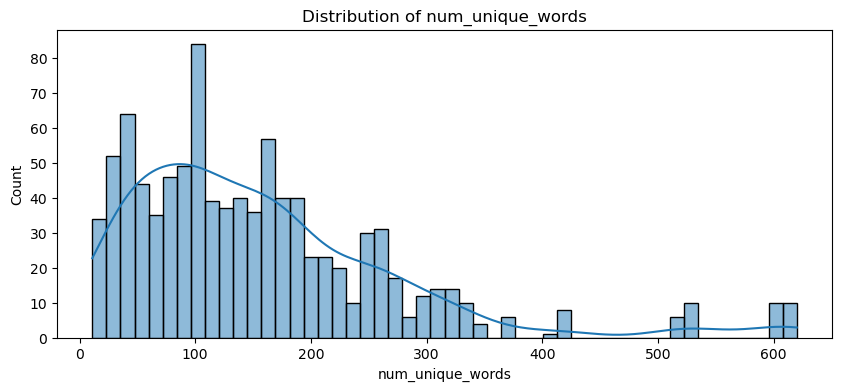

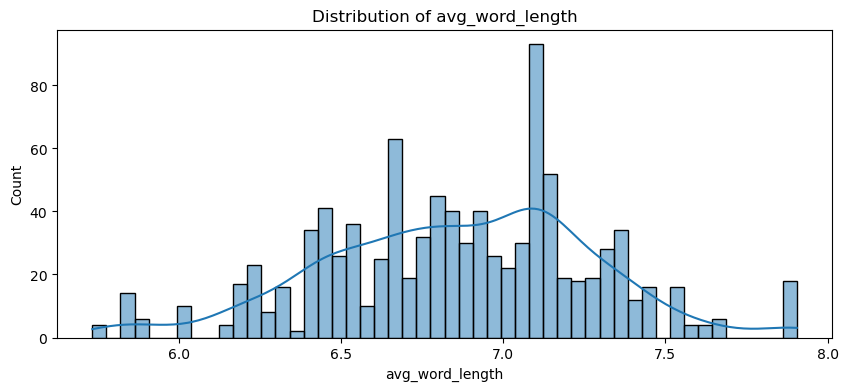

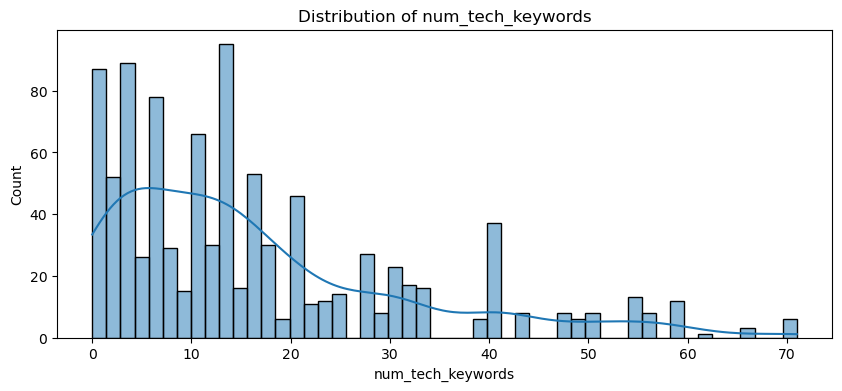

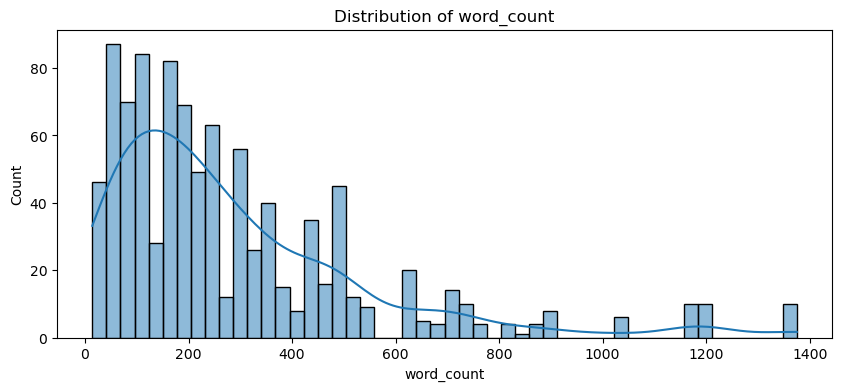

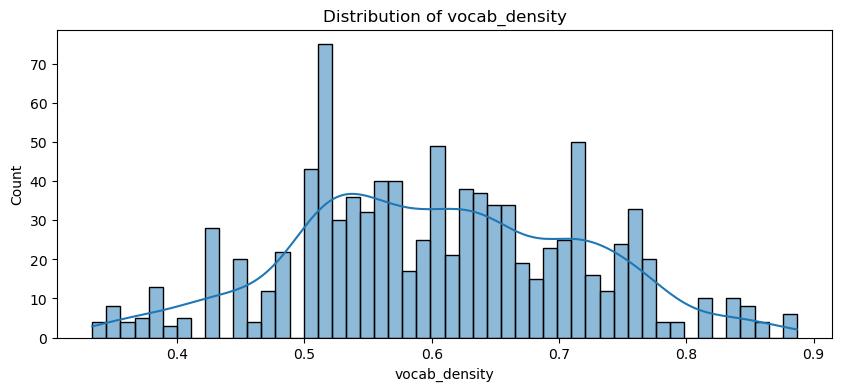

In [401]:
dist_cols = ["num_unique_words", "avg_word_length", "num_tech_keywords", "word_count", "vocab_density"]
for columns in dist_cols:
    plot_distribution(df= df, column= columns)

In [402]:
log_cols = ["num_unique_words", "num_tech_keywords", "word_count"]
for lcolumns in log_cols:
    df[lcolumns] = np.log1p(df[lcolumns])

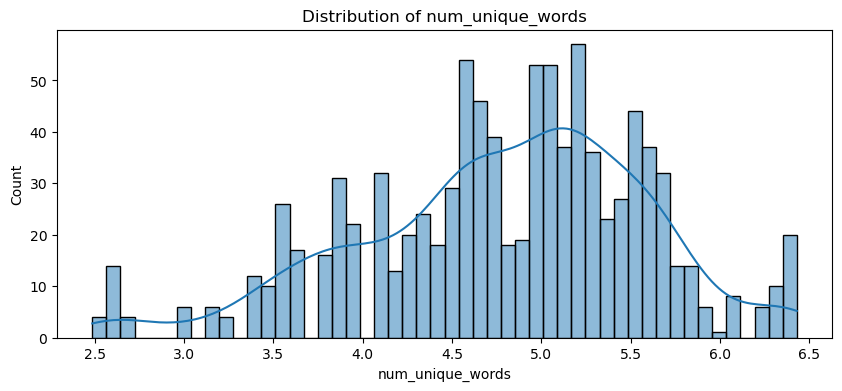

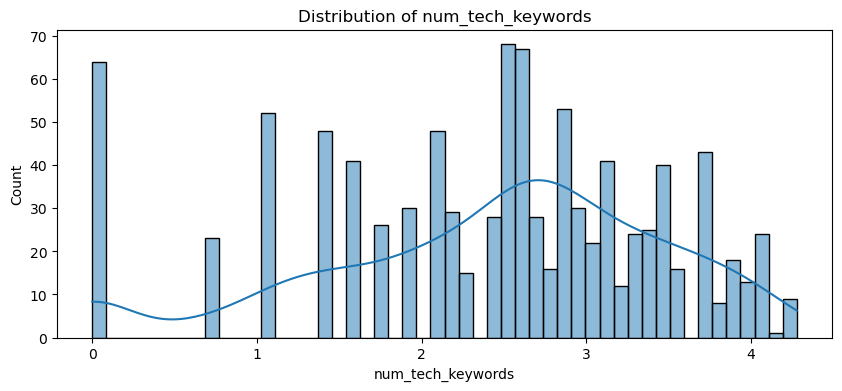

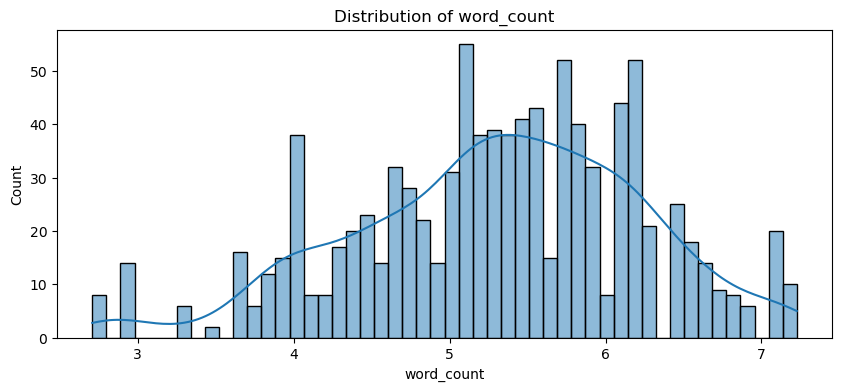

In [404]:
log_cols = ["num_unique_words", "num_tech_keywords", "word_count"]
for columns in log_cols:
    plot_distribution(df= df, column= columns)

# the distribution looks better now

In [406]:
log_cols = ["num_unique_words", "num_tech_keywords", "word_count"]
for co in log_cols:
       print(f"{co} : {df[co].skew()}")

num_unique_words : -0.47885726882196467
num_tech_keywords : -0.6252952624910747
word_count : -0.3555522985177561


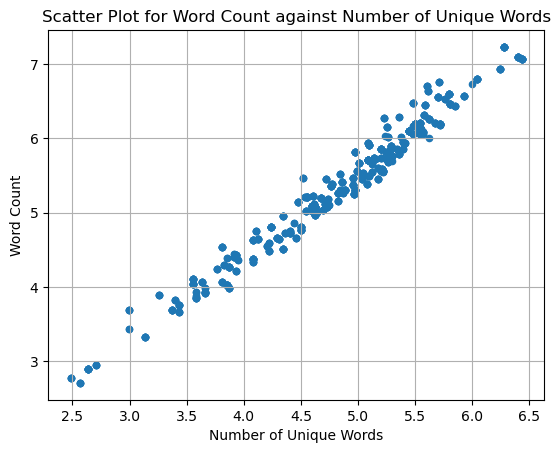

In [405]:
df.plot(kind= "scatter", x= "num_unique_words", y= "word_count" , grid= True)
plt.title("Scatter Plot for Word Count against Number of Unique Words")
plt.xlabel("Number of Unique Words")
plt.ylabel("Word Count")
plt.show()

# word count and no of unique words have a very stong correlation

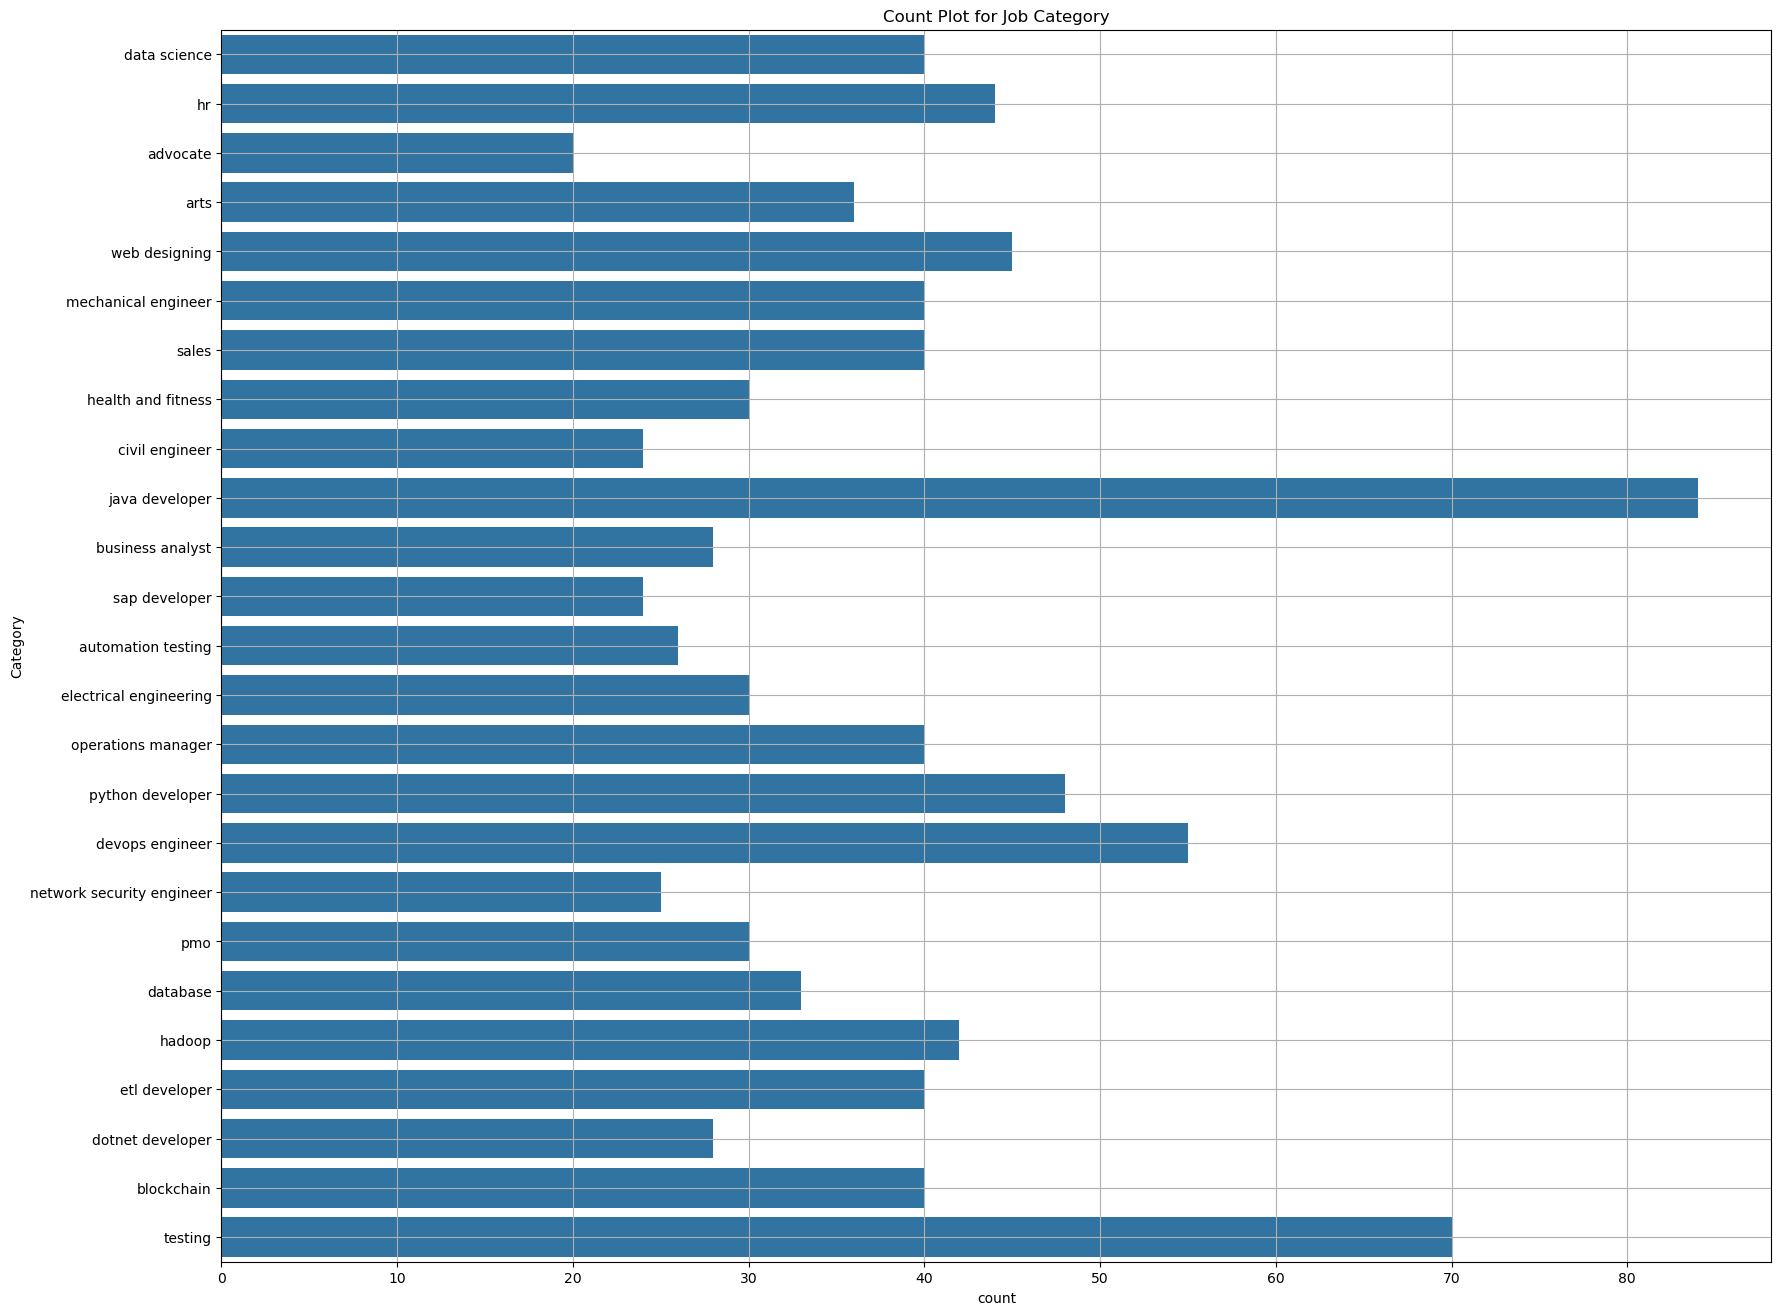

In [407]:
plt.figure(figsize= (20, 16))
plt.title("Count Plot for Job Category")
sns.countplot(data= df, y= "Category")
plt.grid(visible= True)
plt.show()


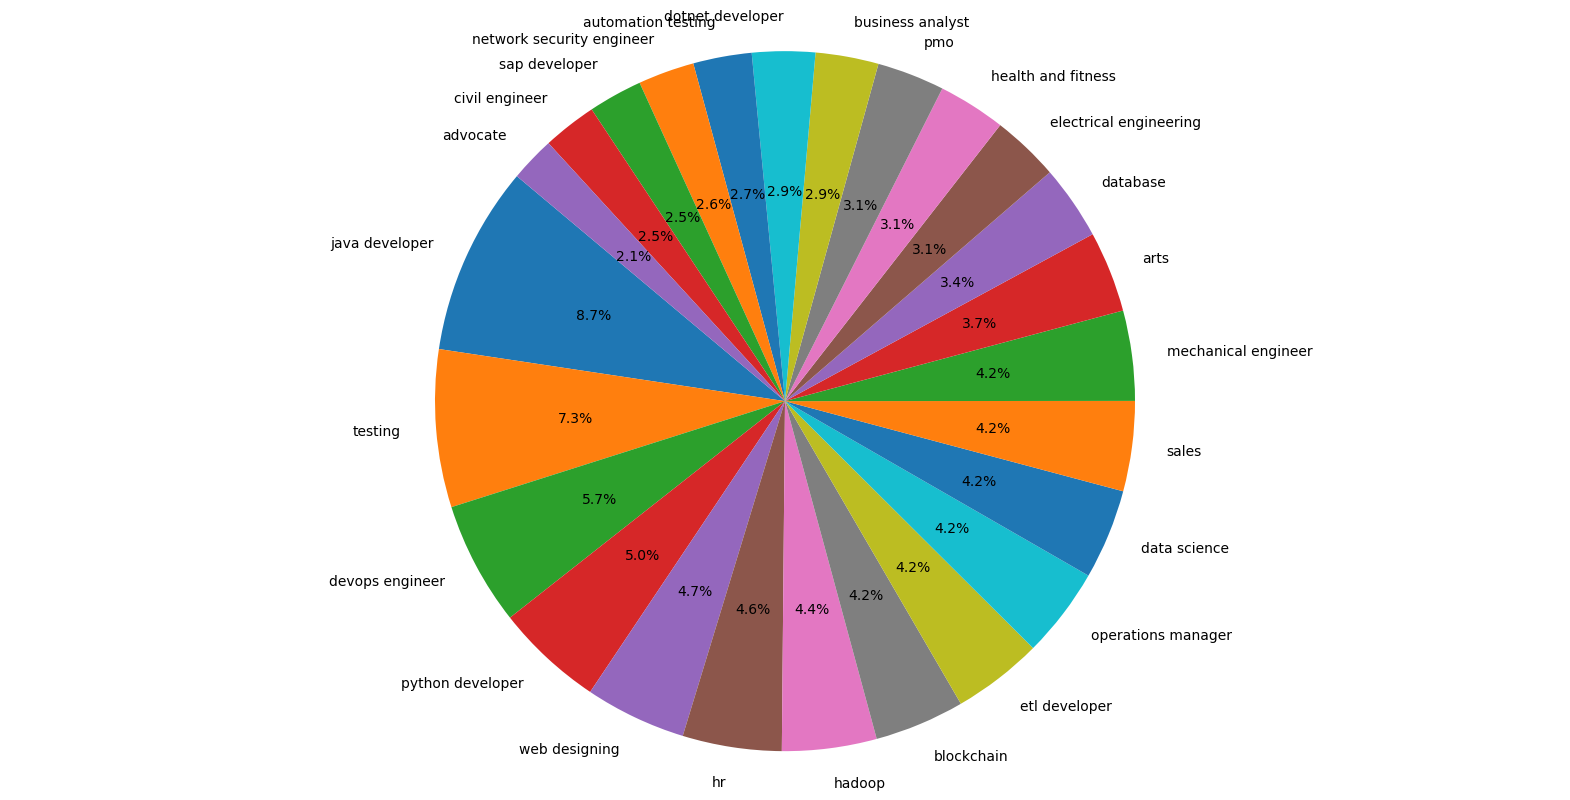

In [408]:
sizes = df["Category"].value_counts()
labels = sizes.index

plt.figure(figsize= (20, 10))
plt.pie(sizes, labels= labels, startangle= 140, autopct= "%1.1f%%")
plt.axis("equal")
plt.show()

In [409]:
def box_plot(df, y_column : None, x_column: None) -> None:
    plt.figure(figsize= (12, 10))
    sns.boxplot(data= df, y= y_column, x= x_column)
    plt.title(f'Boxplot of {y_column} and {x_column} ')
    if x_column is None:
        plt.xlabel(f"Count")
    else:
        plt.xlabel(f"{x_column}")
    if y_column is None:
        plt.ylabel(f"Count")
    else:
        plt.ylabel(f'{y_column}')
    plt.show()

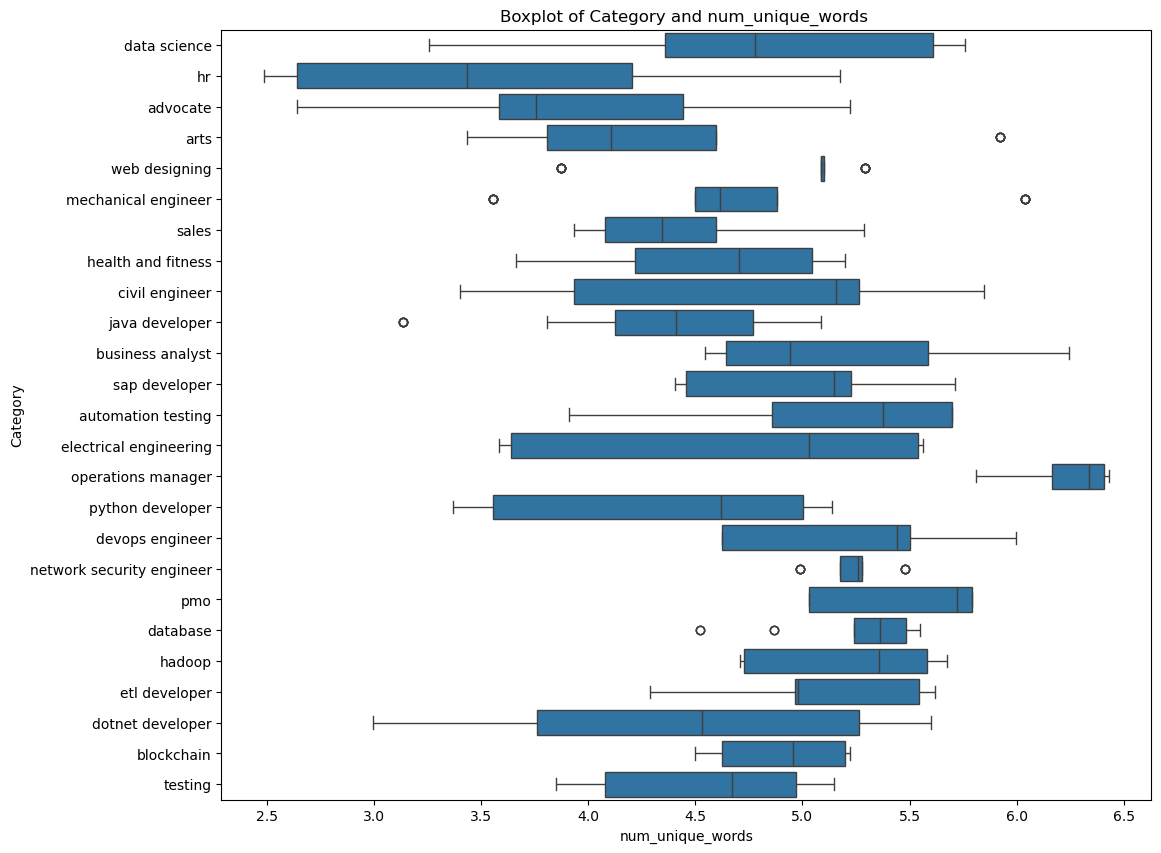

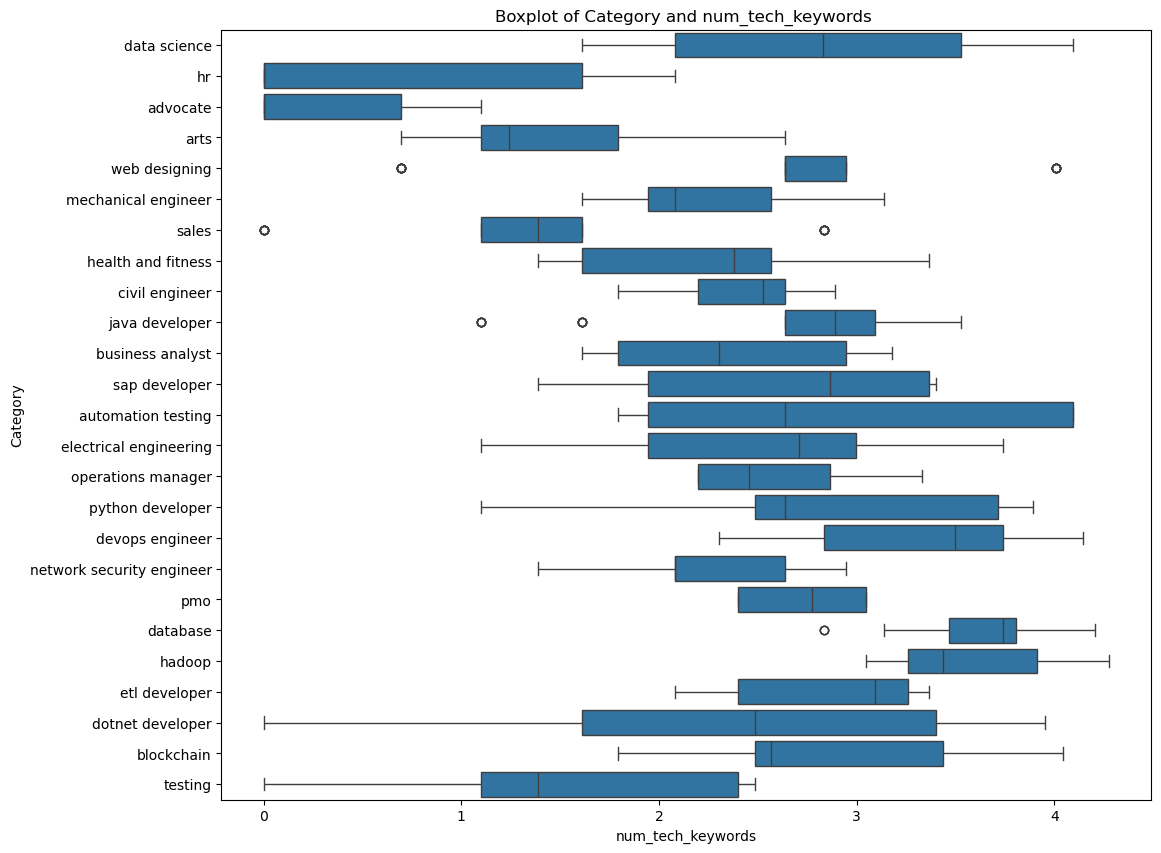

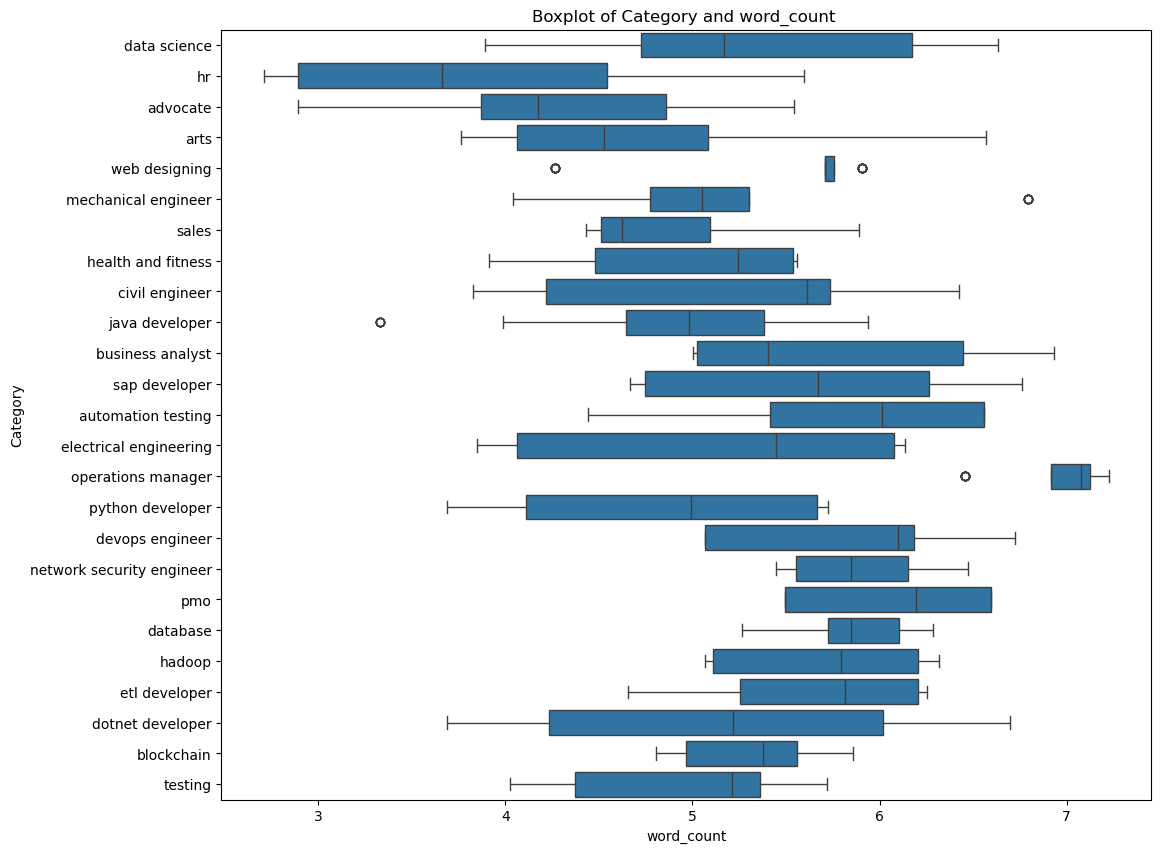

In [411]:
num_cols_transform =  ["num_unique_words", "num_tech_keywords", "word_count"]
for cols in num_cols_transform:
    box_plot(df= df, y_column= "Category", x_column=cols)

# some skewness and outliers still persist, but due to small dataset further engineering will greatly reduce dataset size 

In [413]:
df.to_csv("../data/processed/processed_resume.csv")